In [1]:
#https://www.tensorflow.org/api_docs

In [1]:
# Initializing Essential Libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
import os.path

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
# setting path for training data
train_path = 'ASL/asltrain/'

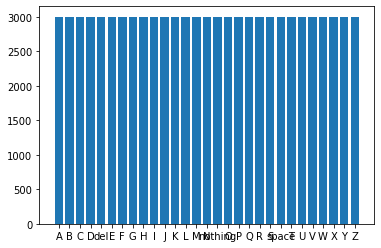

<Figure size 432x288 with 0 Axes>

In [3]:
# Plotting the count of images for each class
classes = os.listdir(train_path)
nos = []
lable =[]
for i in classes:
    nos.append(len(os.listdir(train_path+i)))
    lable.append(i)
plt.bar(classes, nos)
plt.show()
plt.savefig('output.png', dpi=300, bbox_inches='tight')

In [4]:
# Displaying the lable of each class
lable

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

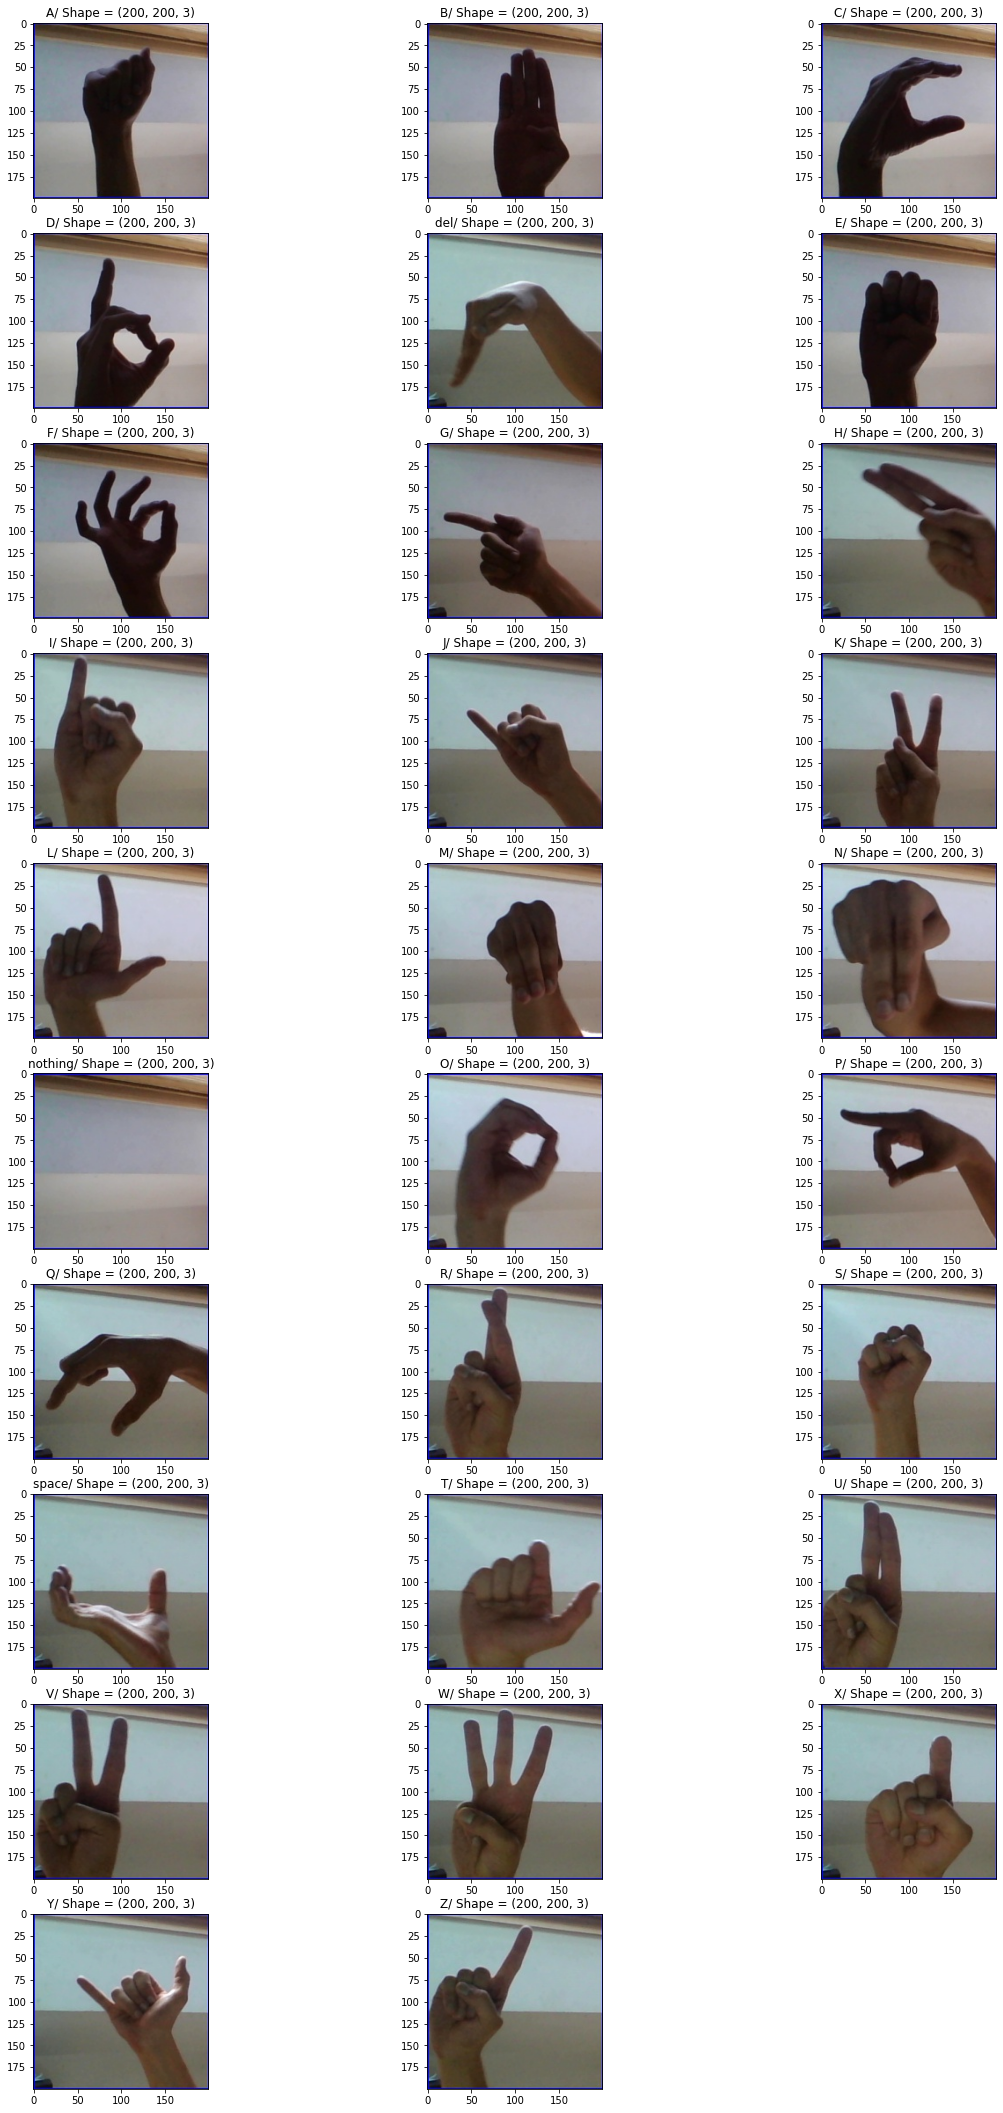

In [5]:
# Visualizations of some of the train data
from PIL import Image
plt.figure(figsize=(20,38))
for i in enumerate(classes):
    image = os.listdir(train_path+i[1])[0]
    image = Image.open(train_path+i[1]+'/'+image)
    image = np.asarray(image)
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    plt.title('{0}/ Shape = {1}'.format(i[1], image.shape))
plt.show()

In [40]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (64,64,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (64,64,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (64,64,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 29, activation = 'softmax'))

In [41]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)      

In [42]:
# compilling the model
cnn_model.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [43]:
# Preprocessing of Data
from keras.preprocessing.image import ImageDataGenerator
# Generating train and validation set from dataset using ImageDataGenerator object


datagen = ImageDataGenerator(rescale=1/255, validation_split=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        )

training_set = datagen.flow_from_directory(train_path,
        
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        color_mode="grayscale",
        subset ='training',
        shuffle='False')

test_set = datagen.flow_from_directory(
        train_path,
        
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        color_mode="grayscale",
        subset = 'validation',shuffle='False')


Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [44]:
# Print training set classes
training_set.class_indices.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

In [46]:
#Training the CNN model
history = cnn_model.fit(training_set, batch_size=32, epochs = 20
                        
                        , verbose = 1, validation_data = test_set)

Epoch 1/20
2447/2447 [==============================] - 354s 145ms/step - loss: 1.4587 - accuracy: 0.5525 - val_loss: 1.3051 - val_accuracy: 0.5737
Epoch 2/20
2447/2447 [==============================] - 356s 145ms/step - loss: 0.5151 - accuracy: 0.8299 - val_loss: 1.0538 - val_accuracy: 0.6620
Epoch 3/20
2447/2447 [==============================] - 357s 146ms/step - loss: 0.3414 - accuracy: 0.8874 - val_loss: 0.9582 - val_accuracy: 0.7133
Epoch 4/20
2447/2447 [==============================] - 354s 145ms/step - loss: 0.2582 - accuracy: 0.9127 - val_loss: 0.9232 - val_accuracy: 0.7189
Epoch 5/20
2447/2447 [==============================] - 355s 145ms/step - loss: 0.2183 - accuracy: 0.9280 - val_loss: 0.9281 - val_accuracy: 0.7195
Epoch 6/20
2447/2447 [==============================] - 355s 145ms/step - loss: 0.1859 - accuracy: 0.9389 - val_loss: 1.0065 - val_accuracy: 0.7161
Epoch 7/20
2447/2447 [==============================] - 356s 145ms/step - loss: 0.1678 - accuracy: 0.9450 - val_

In [97]:
# Saving thr trained model for further use 
cnn_model.save('HSR.h5')

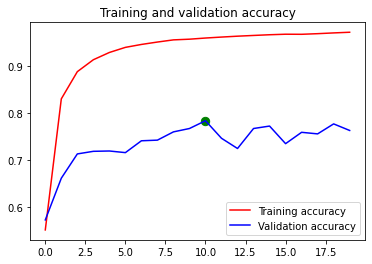

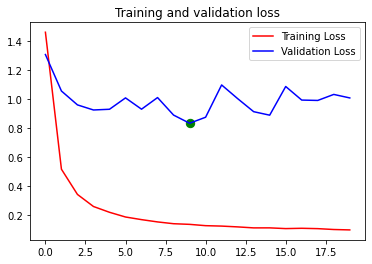

In [47]:
#Plotting accuracy, Loss and  Validation accuracy and validation lose after training
%matplotlib inline
acc = np.array(history.history['accuracy'])
val_acc = np.array(history.history['val_accuracy'])
loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

epochs = np.arange(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.scatter(epochs[val_acc.argmax()], val_acc.max(), color='green', s=70)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.scatter(epochs[val_loss.argmin()], val_loss.min(), color='green', s=70)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
num_of_test_samples = 956
batch_size = 32

validation_generator = datagen.flow_from_directory('ASL/asltest/',
                                                     target_size=(64, 64),
                                                       batch_size=batch_size,
                                                      color_mode="grayscale",
                                                       class_mode='categorical',
                                                     shuffle="False")

Y_pred = cnn_model.predict(validation_generator,num_of_test_samples//batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

print(confusion_matrix(validation_generator.classes, y_pred))


Found 956 images belonging to 29 classes.
Confusion Matrix
[[1 1 0 2 0 1 1 1 3 0 2 2 1 0 1 0 4 2 1 1 2 0 1 2 0 2 0 0 2]
 [1 0 0 1 2 1 1 2 2 0 1 0 3 2 1 0 2 0 1 0 0 2 2 0 1 1 3 2 2]
 [1 1 3 1 2 3 0 1 0 0 1 1 0 0 4 1 1 2 0 1 4 0 0 0 0 1 1 4 0]
 [2 0 3 1 1 5 2 1 1 0 0 1 1 0 1 2 1 1 2 2 0 1 0 0 0 3 0 0 2]
 [0 1 0 1 0 0 2 1 3 2 2 2 2 1 1 1 0 4 2 1 2 0 1 0 0 0 3 0 1]
 [3 1 3 1 0 0 0 0 3 1 0 0 0 1 2 1 3 1 0 1 1 2 2 1 2 0 3 1 0]
 [0 2 3 2 0 0 2 2 0 0 3 0 0 0 3 1 2 1 1 0 1 0 2 2 1 2 1 2 0]
 [1 2 1 0 3 0 0 0 2 1 1 3 2 1 2 1 2 1 1 1 2 0 2 1 1 2 0 0 0]
 [0 1 2 0 1 2 2 1 2 3 0 1 1 2 0 1 0 2 0 2 0 0 1 2 1 1 3 1 1]
 [0 1 0 1 1 2 5 0 2 0 1 1 1 1 1 2 1 2 0 1 0 0 1 0 3 1 3 1 1]
 [2 0 1 3 0 1 2 0 1 1 0 2 1 2 1 1 0 1 1 3 1 0 0 1 3 2 0 0 3]
 [1 2 0 1 2 2 2 1 1 2 1 4 3 0 2 0 1 2 2 1 0 1 1 1 0 0 0 0 0]
 [1 1 0 0 2 0 1 2 1 2 0 4 2 1 2 0 2 1 0 1 1 2 1 1 0 2 2 0 1]
 [2 2 1 0 1 1 1 2 1 2 2 1 1 2 1 4 1 1 1 1 1 0 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 2 2 1 0 1 0 1 1 0 1 1 1 1 3 0 2 3 0 4 0 1 1 1]
 [0 1 2 0 0 1 2 1 0 3 0 0 